# Project: Improving Relational Language Understanding in Intelligent Virtual Agents (IVAs)

## INTRODUCTION

Customer service interactions play a pivotal role in user experience. This project aims to enhance the understanding of relational strategies in customer service by analyzing the RSiCS dataset. Additionally, a rule-based chatbot will be integrated to facilitate enhanced user interaction.

## BUSINESS UNDERSTANDING

In today's digital landscape, customer service interactions are increasingly handled by Intelligent Virtual Agents (IVAs), automated systems designed to assist customers with their inquiries. However, many IVAs struggle to effectively understand and respond to the relational aspects of these interactions, such as greetings, backstory, and emotions. Developing a deeper understanding of relational language is crucial for IVAs to provide personalized and empathetic customer experiences, which are essential for fostering positive customer relationships and enhancing satisfaction. Despite the growing reliance on IVAs in customer service, there remains a lack of comprehensive datasets and methodologies for training and evaluating IVAs on relational language comprehension and response generation, posing a significant challenge in improving the quality of customer service in the digital age.

### PROBLEM STATEMENT

Existing Intelligent Virtual Agents (IVAs) often fail to interpret and respond appropriately to relational language cues in customer interactions, leading to suboptimal customer experiences and decreased satisfaction levels. This limitation impedes IVAs' ability to build rapport with customers, address their needs effectively, and cultivate positive relationships. Consequently, there is a pressing need to develop methodologies and tools that enable IVAs to accurately comprehend and respond to relational language cues, thereby improving the quality of customer service interactions and enhancing overall customer satisfaction.

### OBJECTIVE

The objective of this project is to bridge the gap in Intelligent Virtual Agents' (IVAs) ability to understand and respond to relational language cues in customer interactions. By leveraging a comprehensive dataset sourced from three live customer service IVAs operating in the domains of travel and telecommunications, annotated with relational language cues, the aim is to develop and evaluate methodologies for training and enhancing IVAs' relational language comprehension and response generation capabilities. Ultimately, the goal is to empower IVAs to provide more personalized, empathetic, and effective customer service experiences, thereby improving customer satisfaction and loyalty.

### SOURCE OF DATA

### RSiCS Dataset Overview

#### 1. Source of Data
The RSiCS dataset was collected from commercial customer service IVAs and the TripAdvisor airline forum ([source](https://nextit-public.s3-us-west-2.amazonaws.com/rsics.html)).

#### 2. Data Contents and Formatting:

1. **x_y_align.csv**
  - captures alignment and agreement metrics between Annotator A (x) and Annotator B in a group for specific requests.

2. **all_data_by_threshold.csv**:
   - Merges selections and determines user intentions.

3. **tagged_selections_by_sentence.csv**:
   - Identifies relational language in user requests.

4. **all_multi_intent.csv**:
   - Flags requests with multiple intentions for intent detection strategies.

#### 3. Feature Information (Columns):

**x_y_align.csv:**

- **Annotator A ID:** x
- **Annotator B ID:** Annotator that the alignment score with x is calculated against.
- **Group ID:** The group of 4 annotators that the compared users belong to.
- **Dataset ID:** Dataset y that the request originated from.
- **Request ID:** Unique ID of a request to allow joining between different files.
- **Text:** The original request text.
- **Annotator A Text:** The request text with selections from annotator A contained within [ and ].
- **Annotator B Text:** The request text with selections from annotator B contained within [ and ].
- **Length:** The character length (n) of the original request text in column 6.
- **Error:** The number of character positions (e) where the binary determination of A and B do not agree.
- **Alignment Score:** The alignment as calculated by align = (n - e) / n.
- **Agreement:** Whether or not A and B agree that any selection is necessary.


##### all_data_by_threshold.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **MultiIntent**: Flag for multiple user intentions.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Removed**: Length of removed text.

##### tagged_selections_by_sentence.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Greeting**: Presence of greeting.
- **Backstory**: Presence of self-exposure language.
- **Justification**: Presence of justification language.
- **Rant**: Presence of ranting language.
- **Gratitude**: Presence of gratitude expressions.
- **Other**: Presence of additional information.
- **Express Emotion**: Presence of emotional language.

##### all_multi_intent.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Text**: Original request text.
- **Annotator x**: Binary flag for annotator x's belief in multiple intents.

### Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")



# Data Understanding


### Load and Explore Datasets


In [ ]:
#merge all the align.csv files into x_y_align.csv
# Define the list of file names
file_names = ['1_1', '1_2', '1_3', '1_4', '2_1', '2_2', '2_3', '2_4',
              '3_1', '3_2', '3_3', '3_4', '4_1', '4_2', '4_3', '4_4',
              '5_1', '5_2', '5_3', '5_4', '6_1', '6_2', '6_3', '6_4',
              '7_1', '7_2', '7_3', '7_4', '8_1', '8_2', '8_3', '8_4']

# List to store DataFrames
align_dfs = []

# Iterate through each file name and load the corresponding CSV file
for file_name in file_names:
    file_path = f'{file_name}_align.csv'
    df = pd.read_csv(file_path)
    align_dfs.append(df)

# Concatenate all DataFrames into one DataFrame
x_y_align_df = pd.concat(align_dfs, ignore_index=True)

# Save the concatenated DataFrame as x_y_align.csv
x_y_align_df.to_csv('x_y_align.csv', index=False)

# Display information for the concatenated DataFrame
print("Info for x_y_align DataFrame:")
print(x_y_align_df.head())
print(x_y_align_df.info())


Info for x_y_align DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I will be transi

In [ ]:
#load all the datasets and check info.
def load_datasets():

    file_paths = [
        'x_y_align.csv',
        'all_data_by_threshold.csv',
        'tagged_selections_by_sentence.csv',
        'all_multi_intent.csv'
    ]

    # Create a dictionary to store the loaded datasets
    datasets = {file_path.split('.')[0]: pd.read_csv(file_path) for file_path in file_paths}

    return datasets

def explore_datasets(datasets):
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        # Print the first 5 rows
        print("Head of the DataFrame:")
        print(df.head())

        # Print the shape of the DataFrame
        print("\nShape of the DataFrame:", df.shape)

        # Print summary statistics
        print("\nSummary statistics of the DataFrame:")
        print(df.describe())

        # Print information about the DataFrame
        print("\nInformation about the DataFrame:")
        print(df.info())

# Load datasets
loaded_datasets = load_datasets()

# Explore datasets
explore_datasets(loaded_datasets)




x_y_align DataFrame:
Head of the DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I

**x_y_align.csv**

Rows- 81268

columns-12


**all_data_by_threshold**

Rows- 3200

Columns-9

**tagged_selections_by_sentence.**

rows-6759

Rows-14

**all_multi_intent.**

Rows-1241

Columns-12

# Data Cleaning And Preprocessing

####  Data Quality Checks for x_y_align Dataset


In [ ]:
def load_x_y_align_dataset(file_path):
    """
    Load the x_y_align dataset from the specified file path.

    Parameters:
        file_path (str): The path to the CSV file containing the dataset.

    Returns:
        pandas.DataFrame: The loaded dataset.
    """
    try:
        dataset = pd.read_csv(file_path)
        return dataset
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None






1. x_y_align Dataset: Missing values detected in multiple columns, 55 duplicate rows, and outliers observed in Annotator B ID, Length, Error, and Alignment Score.



In [ ]:
def load_x_y_align_dataset(file_path):
    """
    Load the x_y_align dataset from the specified file path.

    Parameters:
        file_path (str): The path to the CSV file containing the dataset.

    Returns:
        pandas.DataFrame: The loaded dataset.
    """
    try:
        dataset = pd.read_csv(file_path)
        # Drop rows with missing values and duplicates
        dataset.dropna(inplace=True)
        dataset.drop_duplicates(inplace=True)
        return dataset
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None




In [ ]:
# Confirm if missing values still exist after dropping
missing_values_exist = x_y_align_df.isnull().values.any()

if missing_values_exist:
    print("Missing values still exist in the dataset after dropping.")
else:
    print("No missing values found in the dataset after dropping.")


Missing values still exist in the dataset after dropping.


In [ ]:
# Print the number of rows and columns after dropping missing values
num_rows, num_columns = x_y_align_df.shape
print(f"Number of rows after dropping missing values: {num_rows}")
print(f"Number of columns after dropping missing values: {num_columns}")


Number of rows after dropping missing values: 81268
Number of columns after dropping missing values: 12


#### Data Quality Checks for All Data by Threshold, Tagged Selections by Sentence, and All Multi-Intent Datasets

In [ ]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df

    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()


In [ ]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df

    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

def print_data_info(df, name):
    print(f"\nInfo for {name} dataset:")
    print("Number of missing values:")
    print(df.isnull().sum())

    print("\nNumber of outliers:")
    # You can add your outlier detection logic here

    print("\nNumber of duplicates:")
    print(df.duplicated().sum())

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()

# Print information for each dataset
print_data_info(all_data, 'all_data_by_threshold')
print_data_info(tagged_selections, 'tagged_selections_by_sentence')
print_data_info(all_multi_intent, 'all_multi_intent')




Info for all_data_by_threshold dataset:
Number of missing values:
Dataset ID              0
Group ID                0
Request ID              0
MultiIntent             0
Threshold               0
MergedSelections        0
Unselected            798
Selected            17087
Removed                 0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for tagged_selections_by_sentence dataset:
Number of missing values:
Dataset                0
Partition              0
SentenceID             0
Threshold              0
MergedSelections       0
Unselected            34
Selected            2969
Greeting               0
Backstory              0
Justification          0
Rant                   0
Gratitude              0
Other                  0
Express Emotion        0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for all_multi_intent dataset:
Number of missing values:
Dataset ID     0
Group ID       0
Request ID     0
Text           0
Annotator 1    0
Annotator

#### "Dropping 'Unselected' and 'Selected' Columns"







In [ ]:
# Load datasets
all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')

# Function to drop columns with missing values and print the updated columns
def drop_columns(df, columns_to_drop, dataset_name):
    df.drop(columns=columns_to_drop, inplace=True)  # Corrected 'axis' to 'columns'
    print(f"Columns after dropping {', '.join(columns_to_drop)} in {dataset_name} dataset:")
    print(df.columns)

# Drop columns for all_data_by_threshold dataset
drop_columns(all_data_by_threshold_df, ['Unselected', 'Selected'], 'all_data_by_threshold')

# Drop columns for tagged_selections_by_sentence dataset
drop_columns(tagged_selections_df, ['Unselected', 'Selected'], 'tagged_selections_by_sentence')



Columns after dropping Unselected, Selected in all_data_by_threshold dataset:
Index(['Dataset ID', 'Group ID', 'Request ID', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Removed'],
      dtype='object')
Columns after dropping Unselected, Selected in tagged_selections_by_sentence dataset:
Index(['Dataset', 'Partition', 'SentenceID', 'Threshold', 'MergedSelections',
       'Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other',
       'Express Emotion'],
      dtype='object')


### "Dataset Merge Operation"

#### "Merging x_y_align and All Multi-Intent Datasets Based on 'Text' Column"







In [ ]:
def merge_datasets(dataset1, dataset2):
    # Merge datasets on the common column 'Text'
    merged_dataset = pd.merge(dataset1, dataset2, on='Text', how='inner')
    return merged_dataset

# Load datasets
x_y_align_data = pd.read_csv('x_y_align.csv')
all_multi_intent_df = pd.read_csv('all_multi_intent.csv')

# Merge datasets
merged_dataset = merge_datasets(x_y_align_data, all_multi_intent_df)

# Display the merged dataset
print(merged_dataset.head())








  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             3.0          2.0         1.0       7306.0   
2              1             5.0          2.0         1.0       7306.0   
3              3             7.0          2.0         1.0       7306.0   
4              3             1.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

#### Merging merged_dataset with all_data_by_threshold Using 'Group ID' and 'Request ID' Columns

In [ ]:
column_names= merged_dataset.columns
print(column_names)

Index(['Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID',
       'Sentence ID', 'Text', 'Annotator A Text', 'Annotator B Text', 'Length',
       'Error', 'Alignment Score', 'Agreement', 'Dataset ID', 'Group ID',
       'Request ID', 'Annotator 1', 'Annotator 2', 'Annotator 3',
       'Annotator 4', 'Annotator 5', 'Annotator 6', 'Annotator 7',
       'Annotator 8'],
      dtype='object')


In [ ]:
def merge_datasets(dataset1, dataset2, common_columns):
    # Merge datasets on the common columns
    merged_dataset = pd.merge(dataset1, dataset2, on=common_columns, how='inner')
    return merged_dataset

# Load datasets
x_y_align_data = pd.read_csv('x_y_align.csv')
all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
all_data_df = pd.read_csv('all_data_by_threshold.csv')

# Merge x_y_align_data and all_multi_intent_df
merged_dataset = merge_datasets(x_y_align_data, all_multi_intent_df, 'Text')

# Merge merged_dataset with all_data_df
final_merged_dataset = merge_datasets(merged_dataset, all_data_df, ['Group ID', 'Request ID'])

# Display the merged dataset
print(final_merged_dataset.head())


  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             7.0          2.0         1.0       7306.0   
2              1             7.0          2.0         1.0       7306.0   
3              1             7.0          2.0         1.0       7306.0   
4              1             3.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

In [ ]:
final_merged_dataset.columns

Index(['Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID',
       'Sentence ID', 'Text', 'Annotator A Text', 'Annotator B Text', 'Length',
       'Error', 'Alignment Score', 'Agreement', 'Dataset ID_x', 'Group ID',
       'Request ID', 'Annotator 1', 'Annotator 2', 'Annotator 3',
       'Annotator 4', 'Annotator 5', 'Annotator 6', 'Annotator 7',
       'Annotator 8', 'Dataset ID_y', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Unselected', 'Selected', 'Removed'],
      dtype='object')

#### Merging final_merged_dataset with tagged_selections_df Using 'Threshold' Column

In [ ]:
def merge_datasets_by_threshold(dataset1, dataset2):
    """
    Merge two datasets based on the common column 'Threshold'.

    Parameters:
        dataset1 (DataFrame): The first dataset.
        dataset2 (DataFrame): The second dataset.

    Returns:
        DataFrame: The merged dataset.
    """
    # Merge datasets on the common column 'Threshold'
    merged_dataset = pd.merge(dataset1, dataset2, on='Threshold', how='inner')
    return merged_dataset

# Load Tagged Selections dataset
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')

# Merge datasets using 'Threshold'
merged_by_threshold = merge_datasets_by_threshold(final_merged_dataset, tagged_selections_df)

# Display the merged dataset
print(merged_by_threshold.head())




  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             7.0          2.0         1.0       7306.0   
2              1             7.0          2.0         1.0       7306.0   
3              1             7.0          2.0         1.0       7306.0   
4              1             7.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

In [ ]:
merged_by_threshold.columns

Index(['Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID',
       'Sentence ID', 'Text', 'Annotator A Text', 'Annotator B Text', 'Length',
       'Error', 'Alignment Score', 'Agreement', 'Dataset ID_x', 'Group ID',
       'Request ID', 'Annotator 1', 'Annotator 2', 'Annotator 3',
       'Annotator 4', 'Annotator 5', 'Annotator 6', 'Annotator 7',
       'Annotator 8', 'Dataset ID_y', 'MultiIntent', 'Threshold',
       'MergedSelections_x', 'Unselected_x', 'Selected_x', 'Removed',
       'Dataset', 'Partition', 'SentenceID', 'MergedSelections_y',
       'Unselected_y', 'Selected_y', 'Greeting', 'Backstory', 'Justification',
       'Rant', 'Gratitude', 'Other', 'Express Emotion'],
      dtype='object')

#### Checking Data Quality for Merged Dataset







In [ ]:
def check_data_quality(df):
    """
    Check data quality: missing values, duplicates, and outliers in binary columns.

    Parameters:
        df (DataFrame): The input DataFrame.

    Returns:
        dict: A dictionary containing information about missing values, duplicates, and outliers.
    """
    # Dictionary to store results
    quality_report = {}

    # Check for missing values
    missing_values = df.isnull().sum().sum()
    quality_report['missing_values'] = missing_values

    # Check for duplicates
    duplicates = df.duplicated().sum()
    quality_report['duplicates'] = duplicates

    # Check for outliers in binary columns
    binary_columns = df.select_dtypes(include=['bool']).columns
    outliers = {}
    for col in binary_columns:
        outliers[col] = df[col].value_counts()

    quality_report['outliers'] = outliers

    return quality_report

quality_report = check_data_quality(merged_by_threshold)
print(quality_report)



{'missing_values': 342396, 'duplicates': 0, 'outliers': {}}


In [ ]:
def check_data_quality(df):
    """
    Check data quality: missing values, duplicates, and outliers in binary columns.

    Parameters:
        df (DataFrame): The input DataFrame.

    Returns:
        dict: A dictionary containing information about missing values, duplicates, and outliers.
    """
    # Dictionary to store results
    quality_report = {}

    # Check for missing values
    missing_values = df.isnull().sum()
    quality_report['missing_values'] = missing_values[missing_values > 0]

    # Check for duplicates
    duplicates = df.duplicated().sum()
    quality_report['duplicates'] = duplicates

    # Check for outliers in binary columns
    binary_columns = df.select_dtypes(include=['bool']).columns
    outliers = {}
    for col in binary_columns:
        outliers[col] = df[col].value_counts()

    quality_report['outliers'] = outliers

    return quality_report


quality_report = check_data_quality(merged_by_threshold)
print(quality_report)


{'missing_values': Selected_x      162216
Unselected_y      2040
Selected_y      178140
dtype: int64, 'duplicates': 0, 'outliers': {}}


#### Creating Binary Identifiers for Columns with Missing Values

In [ ]:
def create_binary_identifiers(df, columns_with_missing):
    """
    Create binary identifier columns based on missing values for specified columns.

    Parameters:
        df (DataFrame): The input DataFrame.
        columns_with_missing (list): A list of column names with missing values.

    Returns:
        DataFrame: DataFrame with binary identifier columns.
    """
    # Create binary identifier columns for specified columns
    for col in columns_with_missing:
        df[f'{col}_binary_identifier'] = df[col].isnull().astype(int)

    return df

# Columns with missing values
columns_with_missing = ['Selected_x', 'Unselected_y', 'Selected_y']

# Example usage:
df_with_binary_identifiers = create_binary_identifiers(merged_by_threshold, columns_with_missing)
print(df_with_binary_identifiers.head())



  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       7306.0   
1              1             7.0          2.0         1.0       7306.0   
2              1             7.0          2.0         1.0       7306.0   
3              1             7.0          2.0         1.0       7306.0   
4              1             7.0          2.0         1.0       7306.0   

                                                Text  \
0  I am not very tech savvy and don't know if I s...   
1  I am not very tech savvy and don't know if I s...   
2  I am not very tech savvy and don't know if I s...   
3  I am not very tech savvy and don't know if I s...   
4  I am not very tech savvy and don't know if I s...   

                                    Annotator A Text  \
0  [I am not very tech savvy and don't know if I ...   
1  [I am not very tech savvy and don't know if I ...   
2  [I am not very tech savvy and don't know if I .

# Feature Selection

**Key Columns Overview:**

In the context of the IVA, several key columns play crucial roles in understanding, organizing, and processing user requests. These columns encompass identification, user input, annotated selections, alignment information, agreement indicators, language class annotations, missing value identifiers, and alignment/quality metrics.

**Identification and Context:**
- `Dataset ID_y`: Helps in understanding the source or domain of the request.
- `Request ID`: Unique identifier for individual requests, aiding in organization and tracking.

**User Input:**
- `Text`: Original user requests serve as input for IVA understanding.

**Annotated Selections:**
- `MergedSelections_y`: Annotated selections by annotators, marking potentially unnecessary parts in user requests.
- `Selected_y`: Text identified as relevant or necessary by annotators.

**Alignment Information:**
- `Alignment Score`: Indicates the alignment between annotators, providing insights into agreement or disagreement.

**Agreement Indicator:**
- `Agreement`: Binary indicator of whether annotators agree on the necessity of any selection.

**Language Class Annotations:**
- `Greeting`, `Backstory`, `Justification`, `Rant`, `Gratitude`, `Other`, `Express Emotion`: Provide information about the nature of language in the highlighted sections, helping in understanding user sentiment and context.

**Selected_y_binary_identifier:**
- `Missing_Selected_y`: Binary identifier for missing values in the 'Selected_y' column. Essential for handling missing data during training and inference.

**Alignment and Quality Metrics:**
- `Length`: Character length of the original request, useful for context and analysis.
- `Error`: Number of character positions where annotators disagree, highlighting potential areas for improvement in training data quality.
- `Removed`: Amount of text removed from the original request by merged selections, aiding in understanding the impact of selections.


In [ ]:
selected_columns = [
    'Dataset ID_y', 'Request ID', 'Text', 'MergedSelections_y', 'Selected_y',
    'Alignment Score', 'Agreement', 'Greeting', 'Backstory', 'Justification',
    'Rant', 'Gratitude', 'Other', 'Express Emotion', 'Selected_y_binary_identifier',
    'Length', 'Error', 'Removed'
]

# Create a new DataFrame with only the selected columns
selected_df = merged_by_threshold[selected_columns]



In [ ]:
#'merged_by_threshold' is the original DataFrame
selected_columns = [
    'Dataset ID_y', 'Request ID', 'Text', 'MergedSelections_y', 'Selected_y',
    'Alignment Score', 'Agreement', 'Greeting', 'Backstory', 'Justification',
    'Rant', 'Gratitude', 'Other', 'Express Emotion', 'Selected_y_binary_identifier',
    'Length', 'Error', 'Removed'
]

# Create a new DataFrame with only the selected columns
selected_df = merged_by_threshold[selected_columns]

# Check the number of columns and rows in the new DataFrame
num_rows, num_cols = selected_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 405540
Number of columns: 18


# Exploratory Data Analysis

### Word Cloud of Text Data

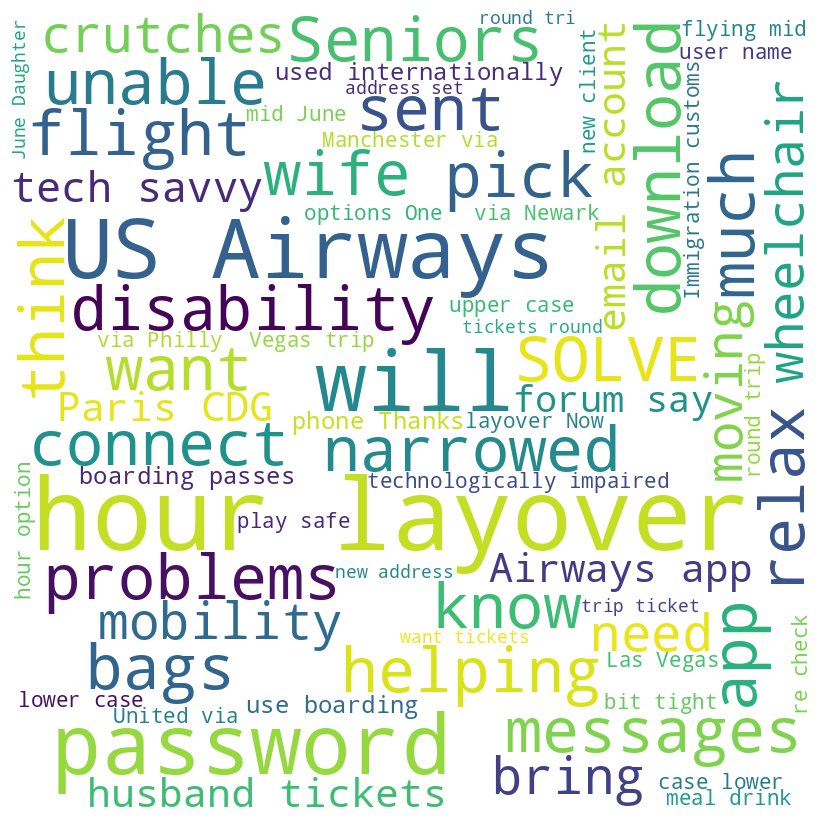

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine text data into a single string
text_combined = ' '.join(selected_df['Text'])

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text_combined)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



The text data is majorly related to travel or airline:

1. The most frequent phrase or combination of words is "hour layover", appearing 243,324 times in the text data.

2. The words "will", "password", and "US Airways" each appear 162,216 times, indicating their significant presence in the text.

3. Other notable words include "know", "download", "app", "sent", "flight", and "messages", each appearing 81,108 times.


### Visualising the numerical columns

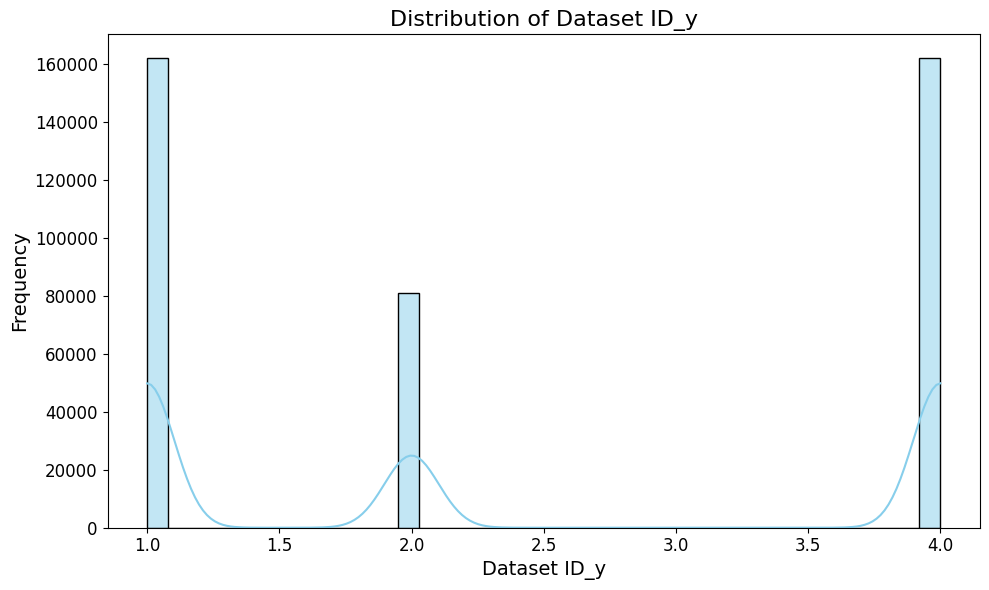

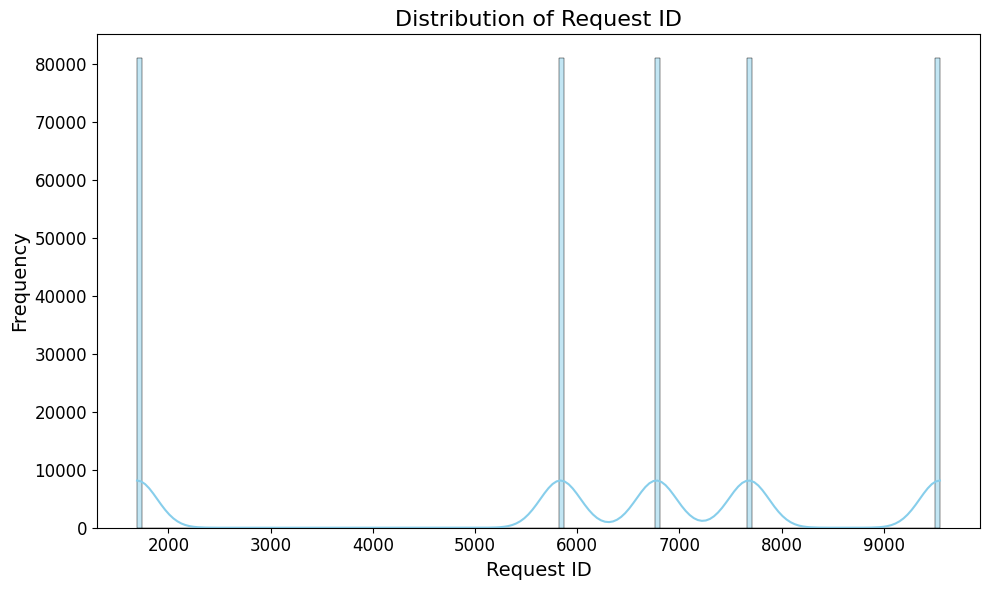

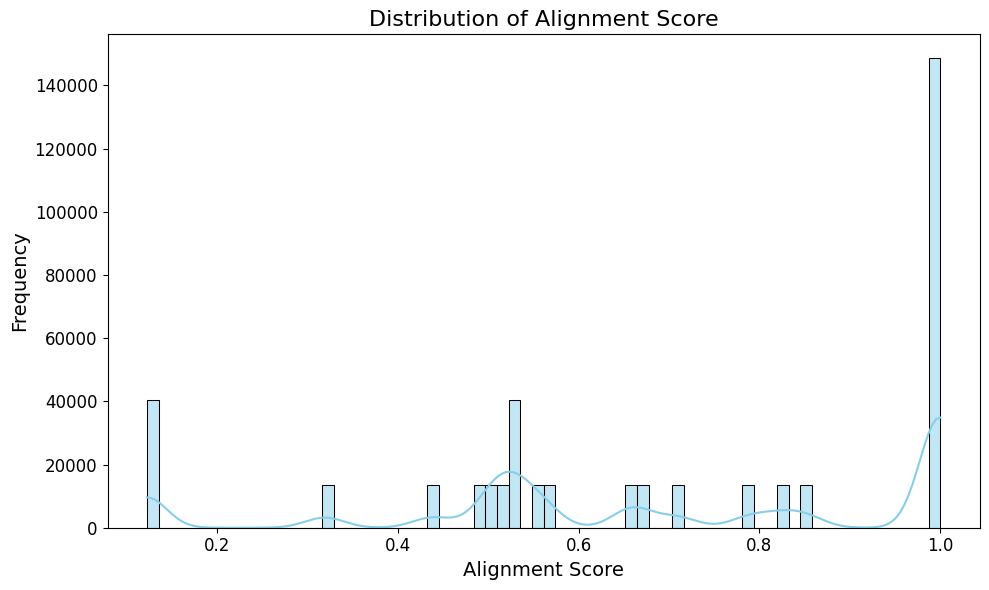

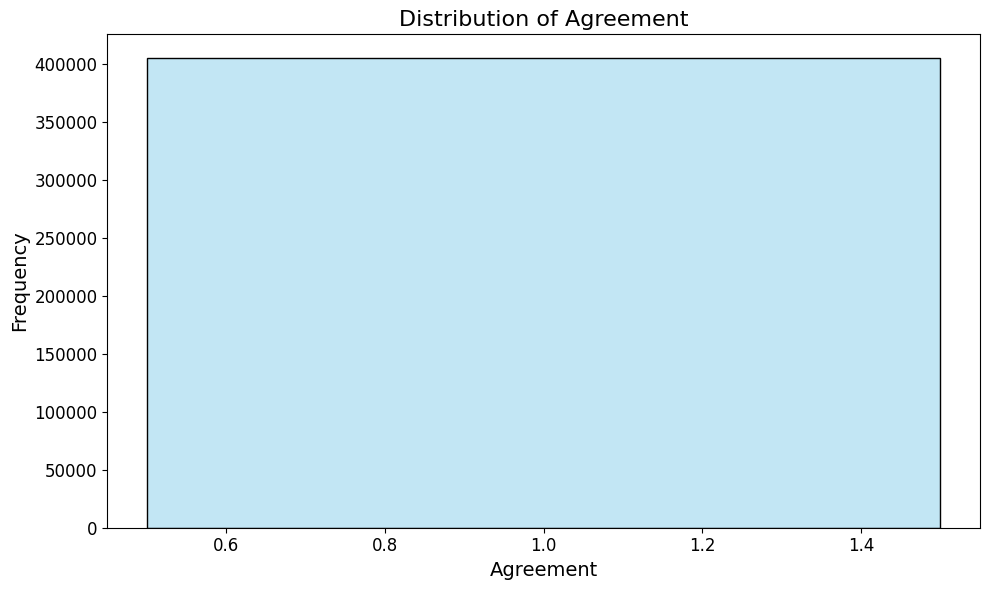

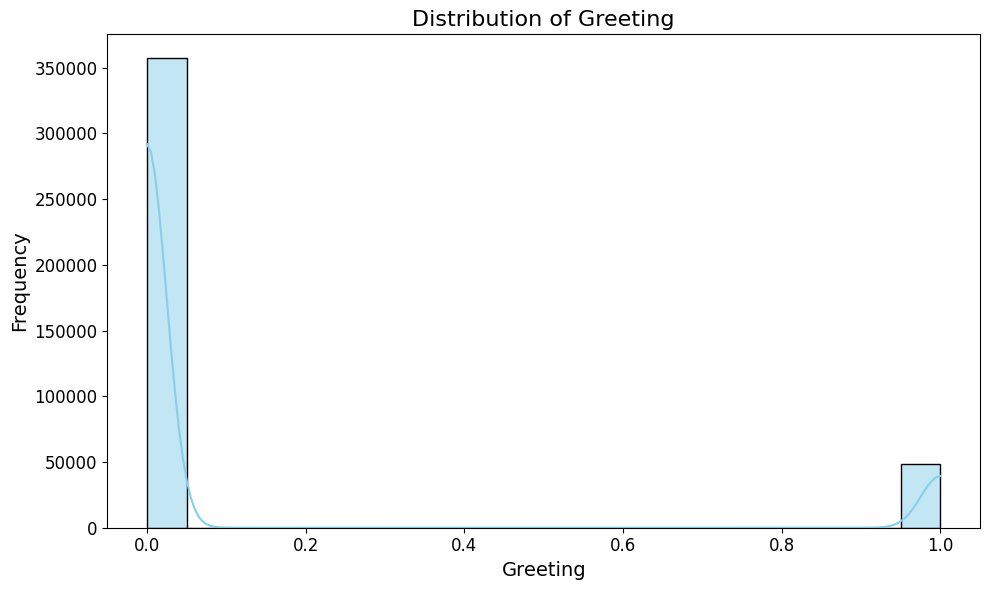

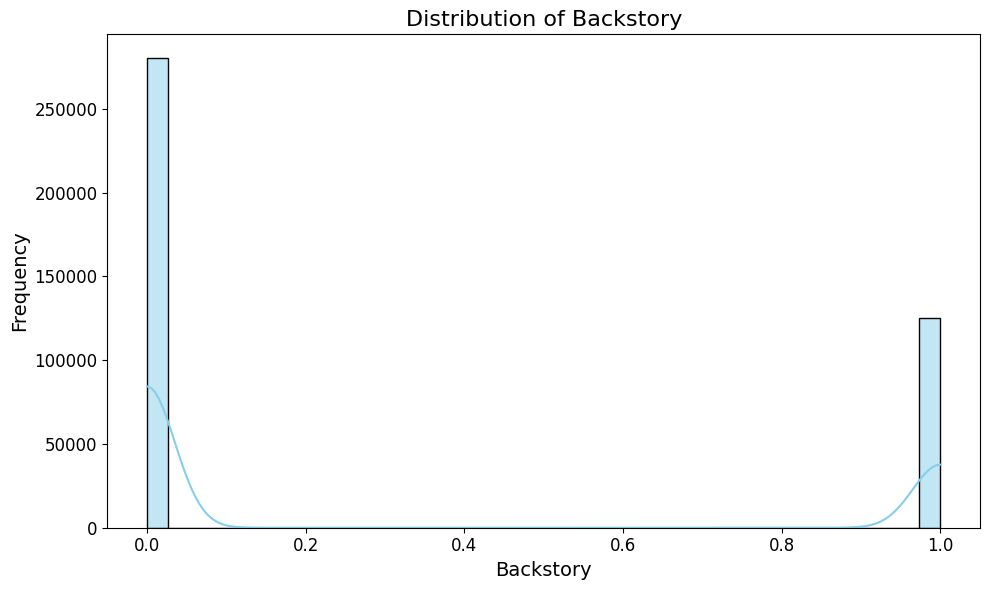

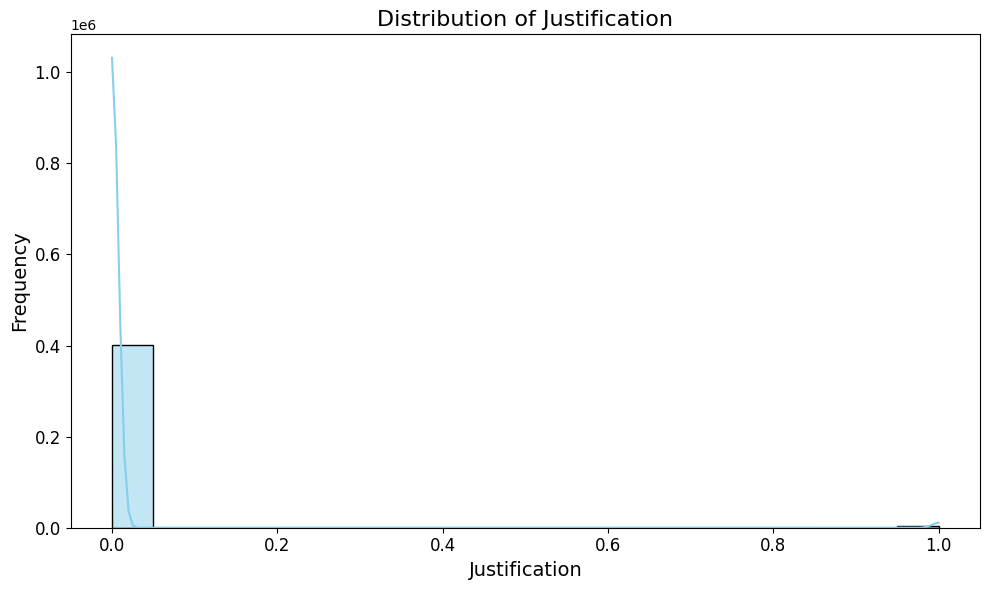

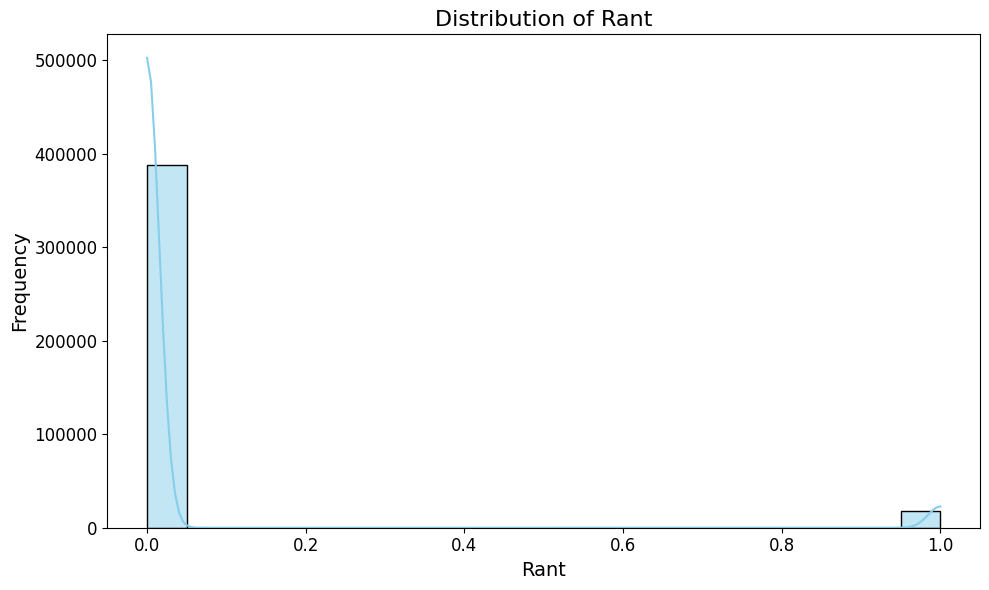

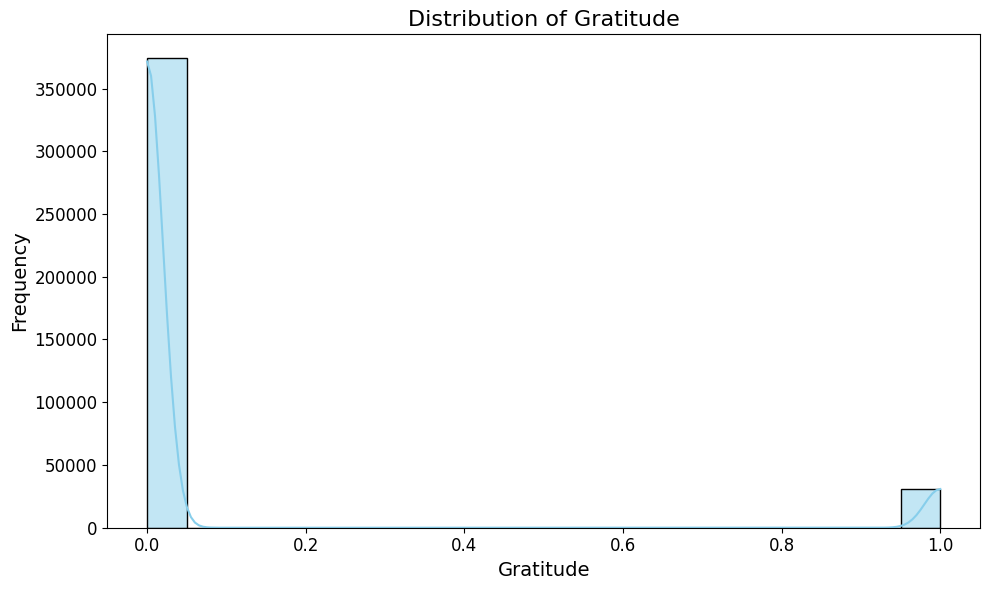

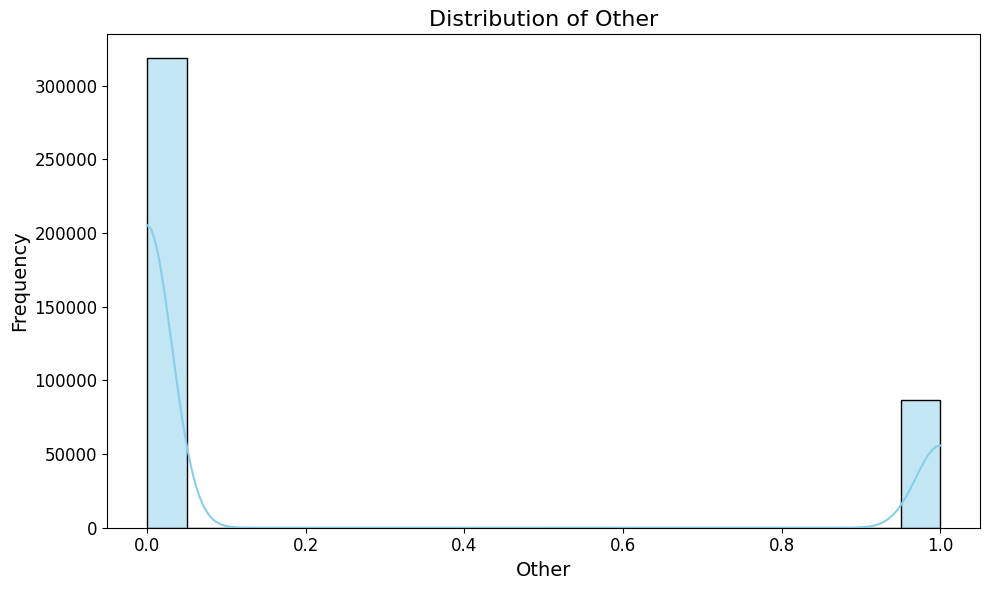

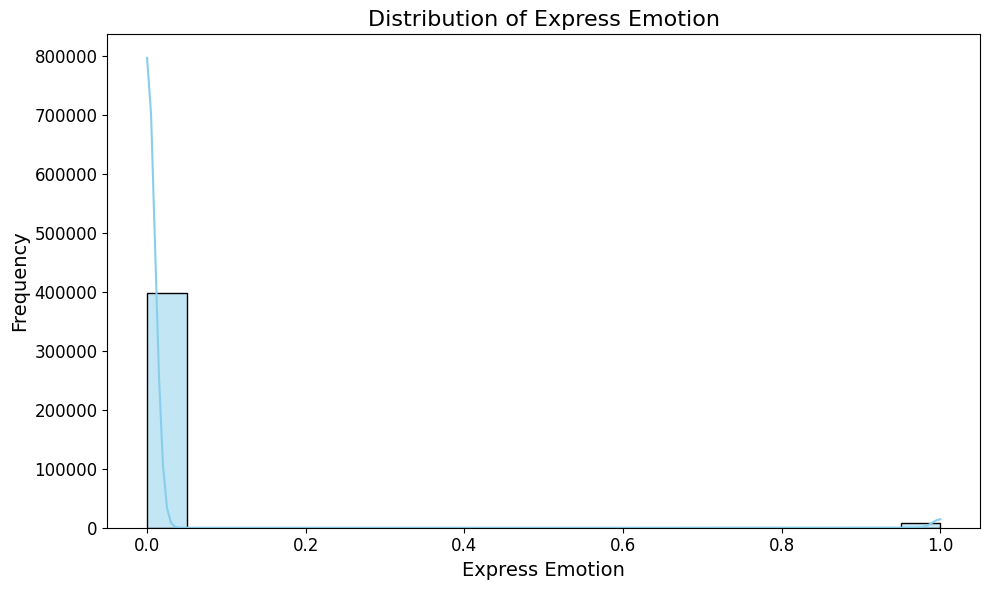

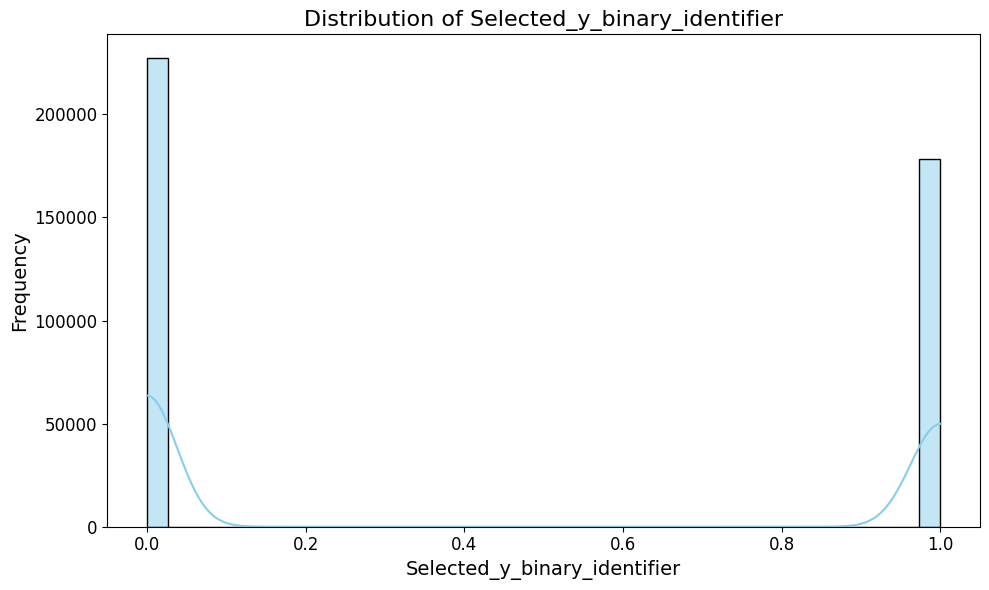

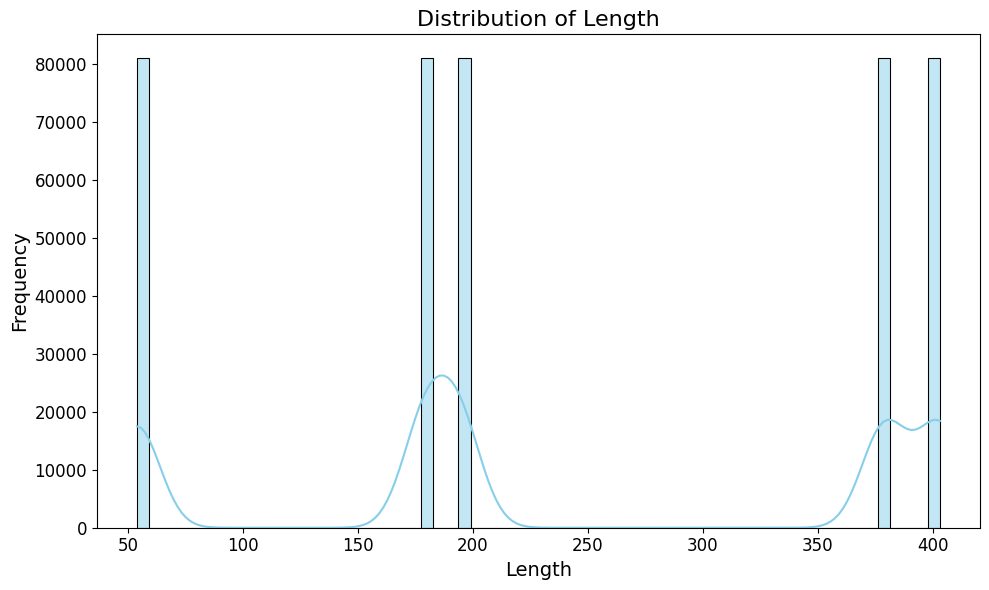

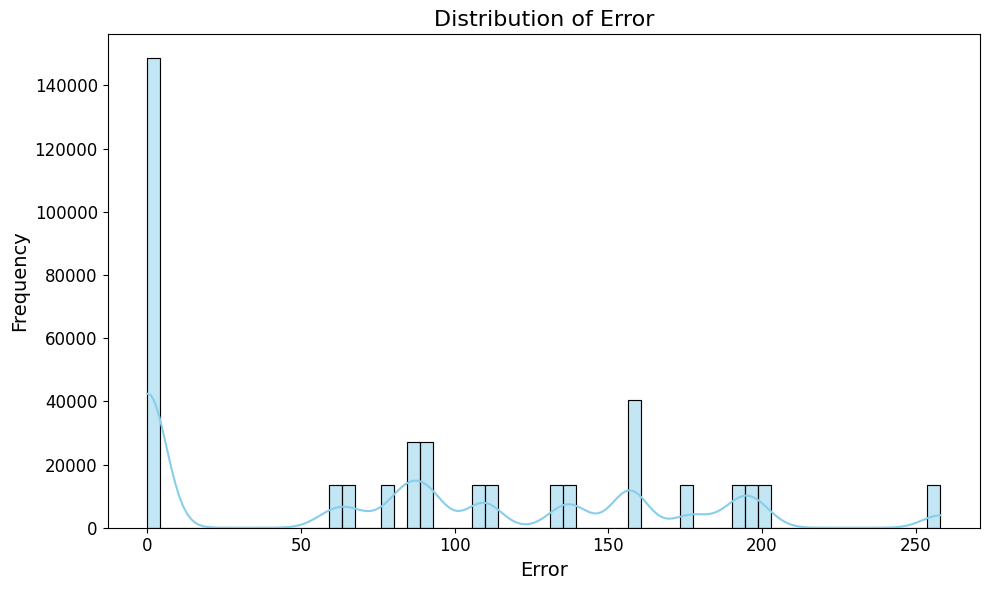

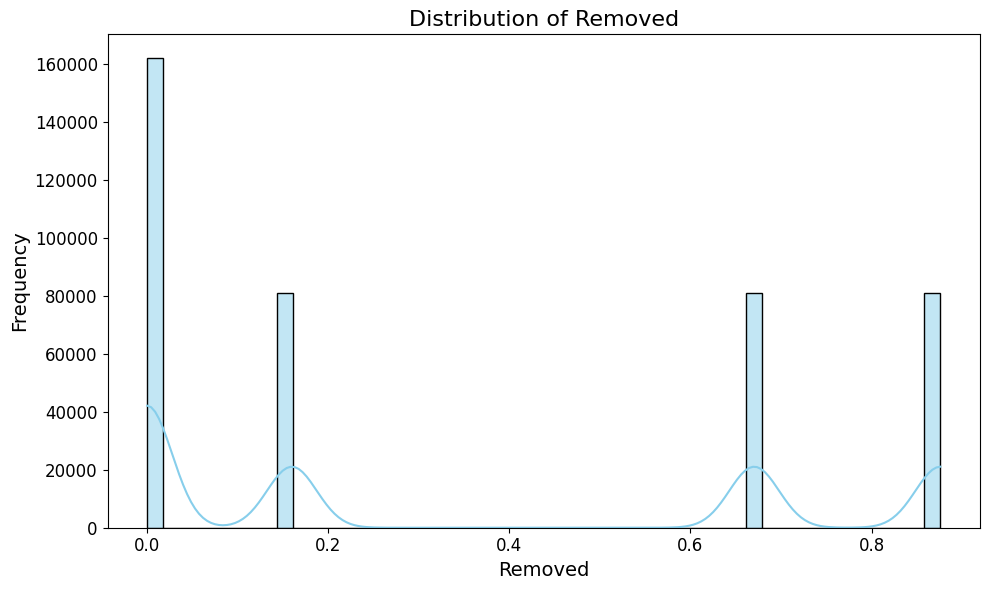

In [ ]:
# Get all numerical columns
numerical_columns = selected_df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=selected_df, x=column, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


1. Dataset ID_y: Majority of the data falls within bins 1 and 38, with significant entries in bin 13 and bin 84.

2. Request ID: Similar to Dataset ID_y, most data points are concentrated in bins 1, 84, and 103.

3. Alignment Score: Entries are spread across various bins, with notable concentrations in bins 1, 16, 25, 30, 32, 34, 41, 42, 45, 52, 55, and 57.

4. Agreement: All data falls within a single bin (bin 1), indicating high agreement across the dataset.

5. Greeting: The majority of greetings fall within bin 1, with a smaller portion in bin 20.

6. Backstory: Predominantly concentrated in bin 1, indicating a low to moderate level of backstory usage across the dataset.



### Visualising Categorical columns

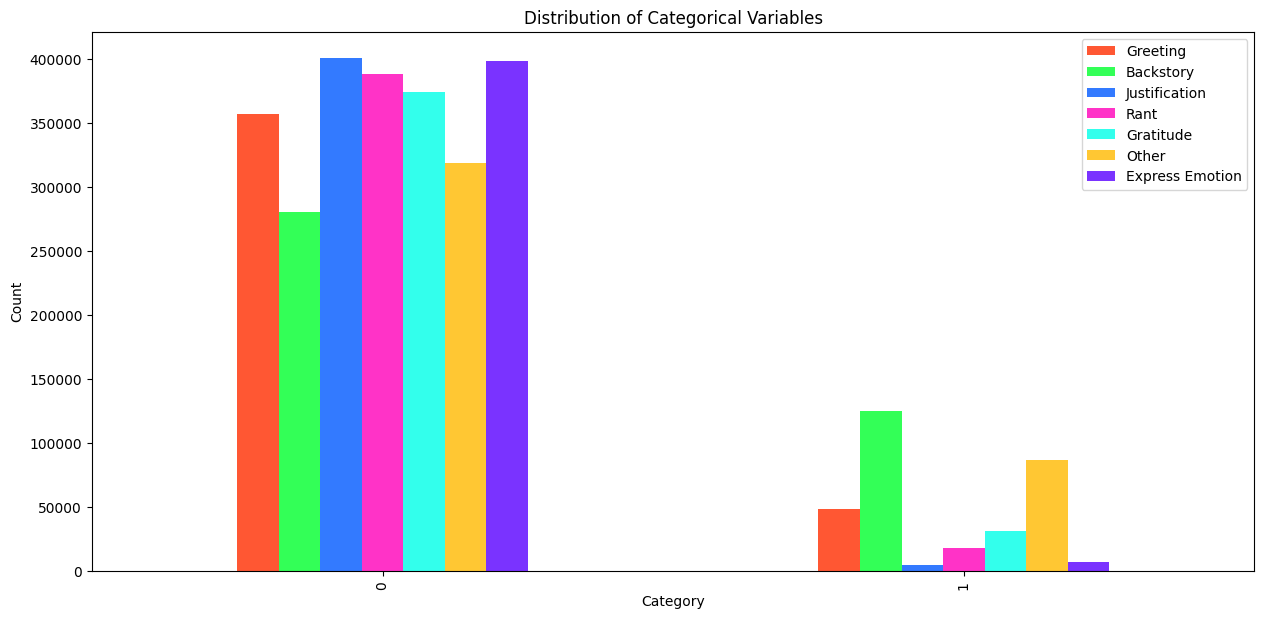

In [ ]:
# List of categorical columns
categorical_columns = ['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion']

# Create a new DataFrame to store the value counts of each column
value_counts_df = pd.DataFrame()

for column in categorical_columns:
    # Get the value counts of the column
    value_counts = selected_df[column].value_counts()
    value_counts_df[column] = value_counts

# Define custom colors
custom_colors = ['#FF5733', '#33FF57', '#337AFF', '#FF33C7', '#33FFEC', '#FFC733', '#7A33FF']

# Create a bar plot with the custom colors
value_counts_df.plot(kind='bar', figsize=(15, 7), color=custom_colors)

plt.title('Distribution of Categorical Variables')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



Value counts for Greeting:
0: 357,420
1: 48,120

Value counts for Backstory:
0: 280,380
1: 125,160

Value counts for Justification:
0: 401,220
1: 4,320

Value counts for Rant:
0: 387,960
1: 17,580

Value counts for Gratitude:
0: 374,460
1: 31,080

Value counts for Other:
0: 318,900
1: 86,640

Value counts for Express Emotion:
0: 398,340
1: 7,200



### Numerical vs Categorical Columns

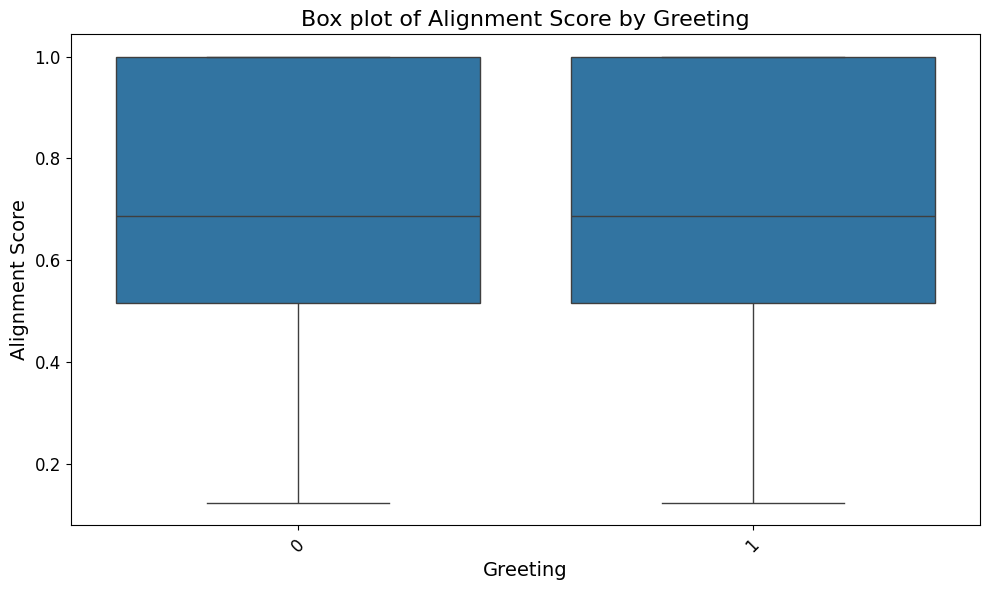

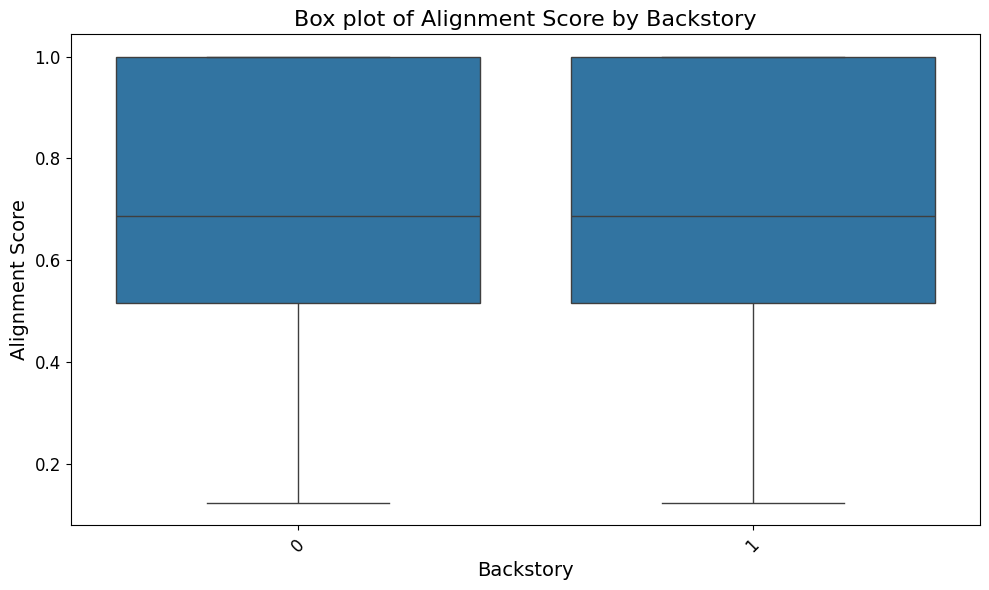

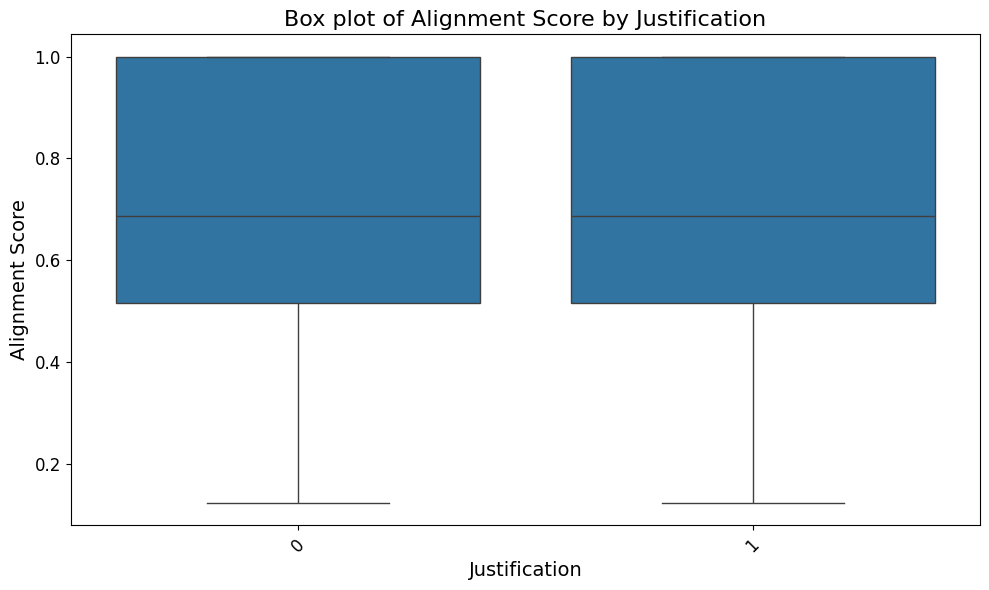

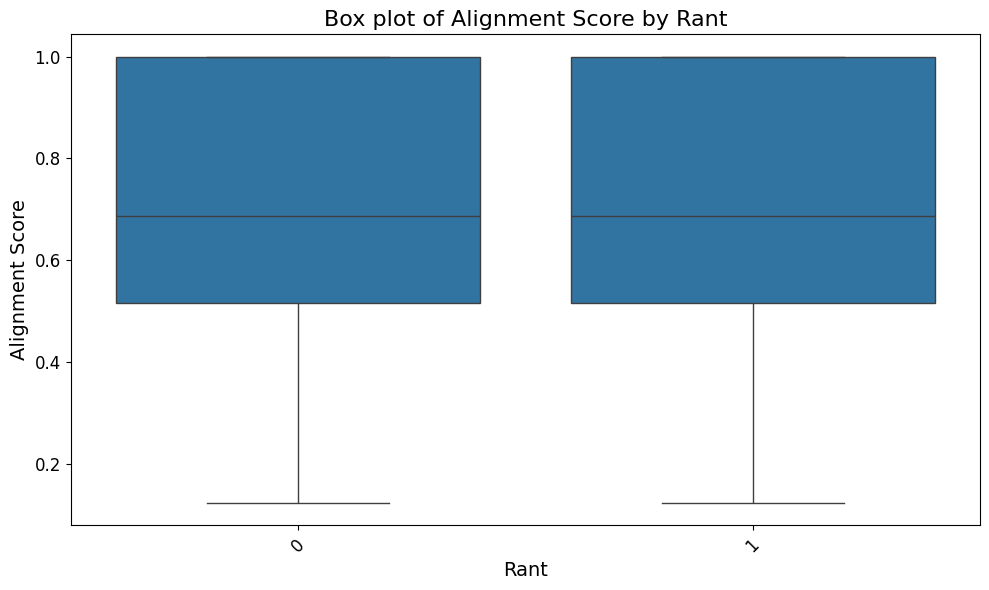

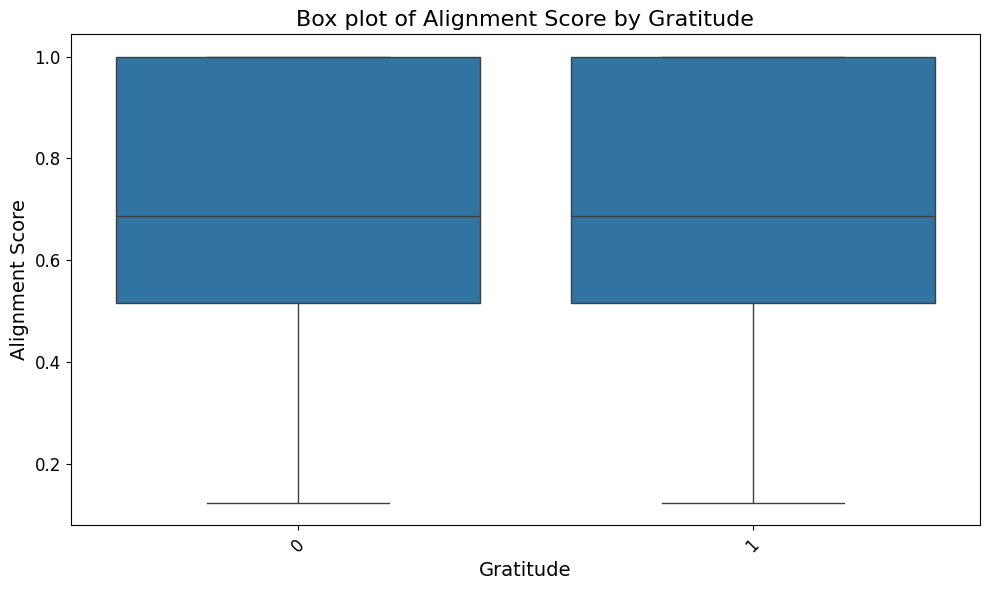

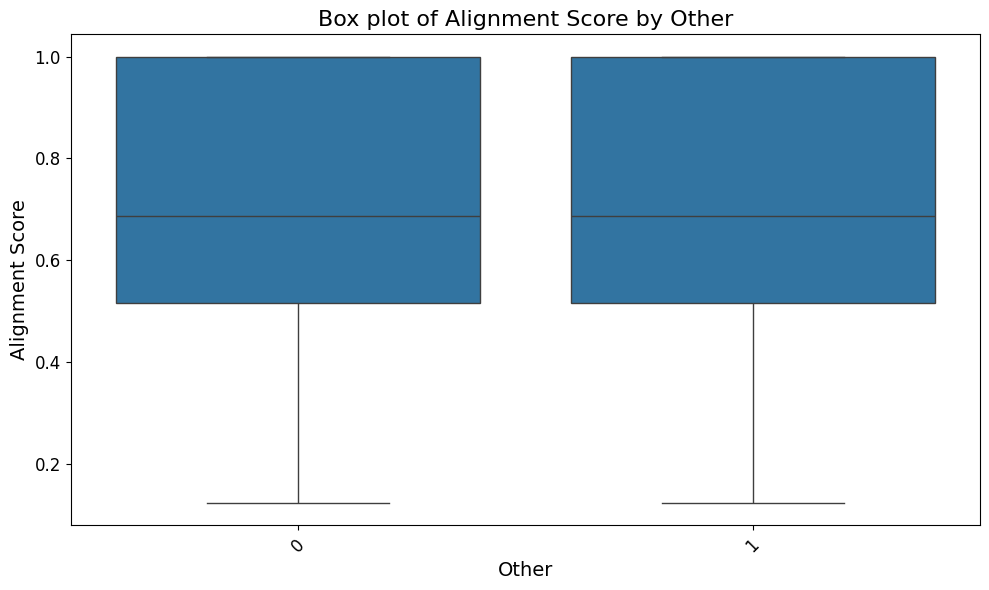

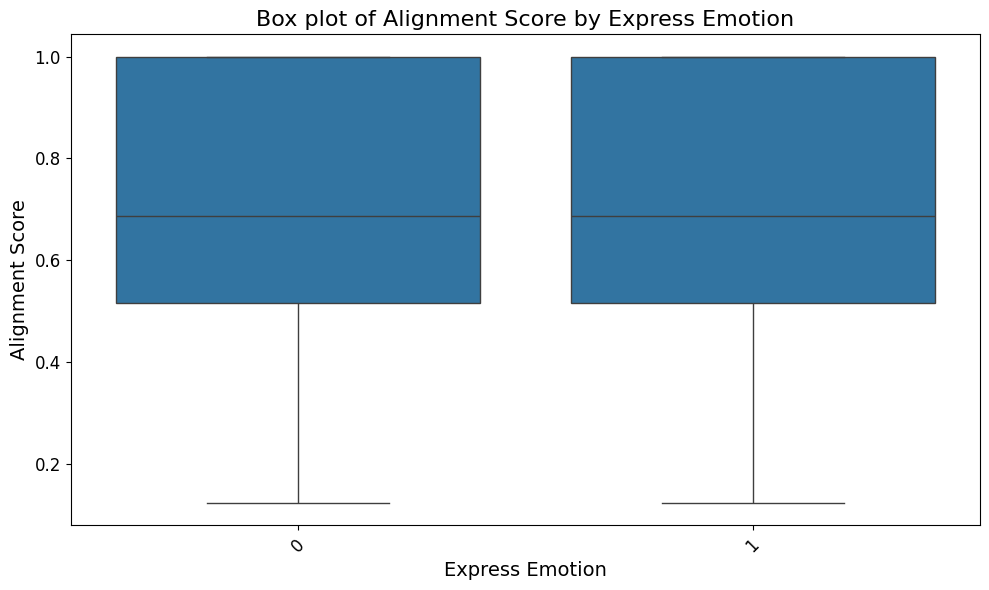

In [ ]:
# Box plot for numerical columns by categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=selected_df, x=column, y='Alignment Score')
    plt.title(f'Box plot of Alignment Score by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Alignment Score", fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


While there are differences in the counts of observations across categories within each categorical variable, the distribution of alignment scores remains relatively consistent, with similar central tendencies and variability across different groups.



### Correlation heatmap for numerical columns

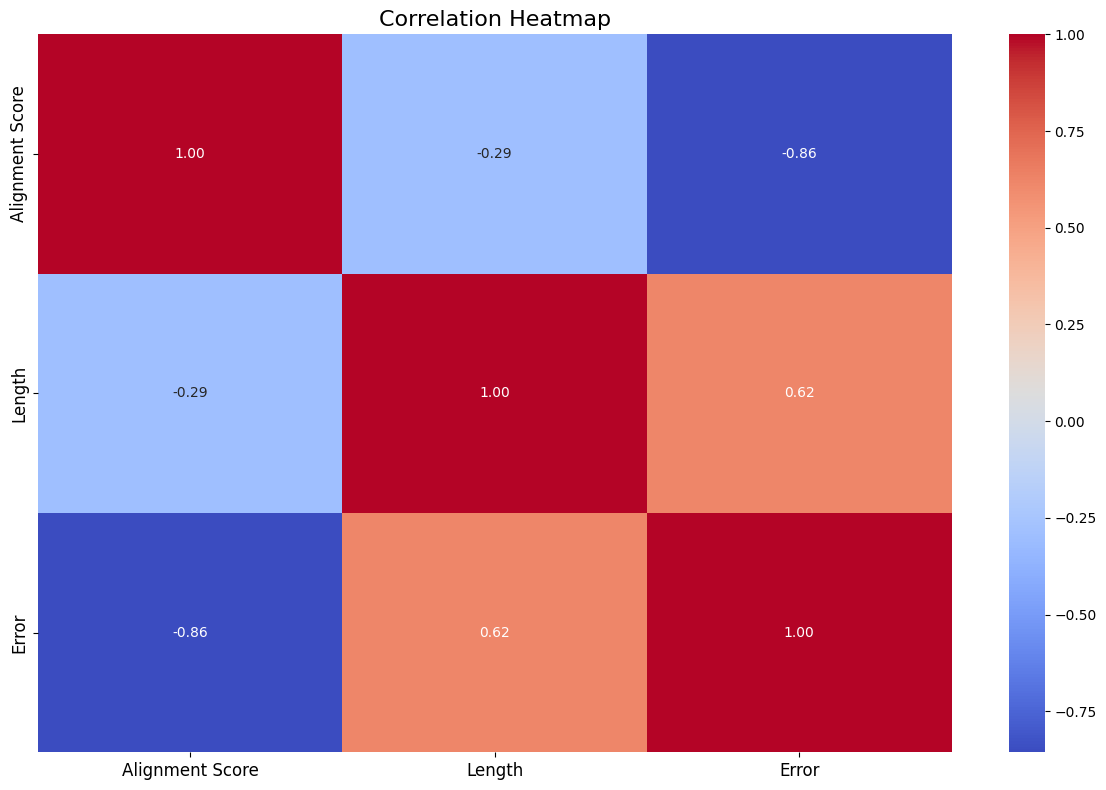

In [ ]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df[['Alignment Score', 'Length', 'Error']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


1. Alignment Score vs. Length: Negative correlation of -0.293, indicating a slight decrease in alignment score as text length increases.

2. Alignment Score vs. Error: Strong negative correlation of -0.856, showing that higher errors correspond to lower alignment scores.

3. Length vs. Error:
Moderate positive correlation of 0.619, suggesting longer texts tend to have higher error rates.


### Correlation Analysis

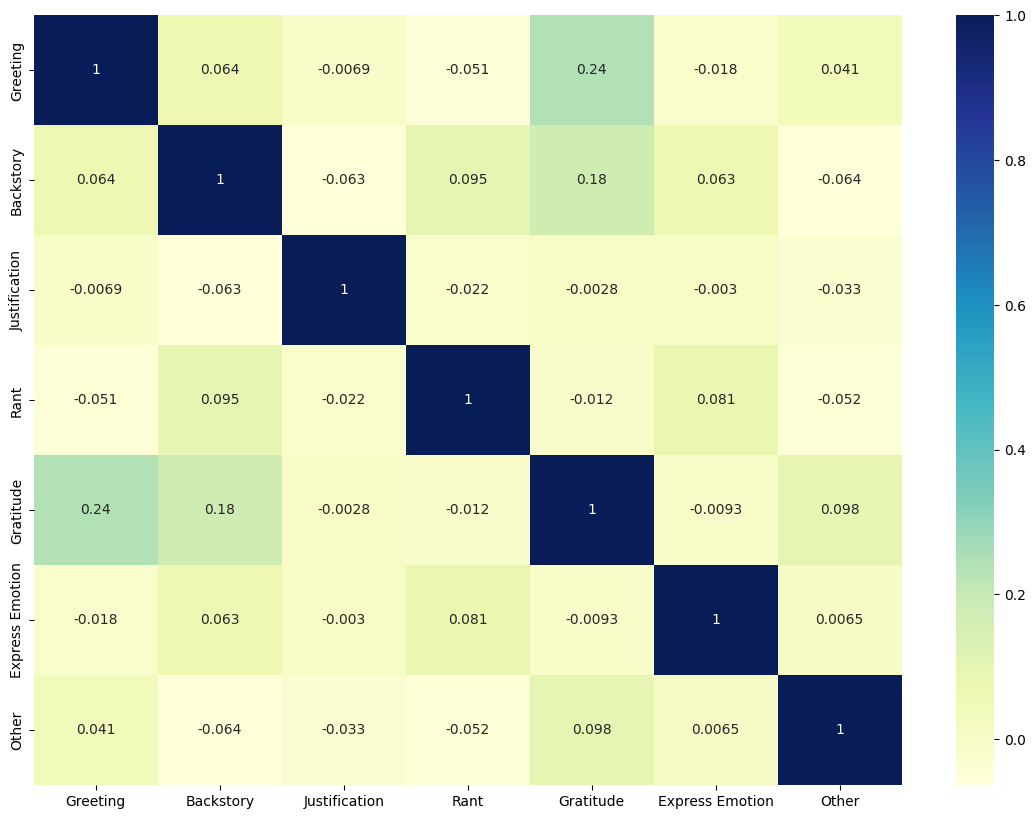

In [ ]:
# Correlation Analysis between the different classes
plt.figure(figsize=(14, 10))
sns.heatmap(selected_df[['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Express Emotion', 'Other']].corr(), annot=True, cmap='YlGnBu')
plt.show()


1. The highest correlation coefficient is observed between 'Gratitude' and 'Greeting', with a value of approximately 0.24. This indicates a weak positive correlation between these two variables. It suggests that there might be some tendency for the presence of 'Greeting' to be associated with instances of 'Gratitude', but the relationship is not very strong.
2. The weakest correlation coefficients are observed for several pairs of variables, including:
'Express Emotion' and 'Justification' with a coefficient of approximately -0.003.
'Express Emotion' and 'Other' with a coefficient of approximately 0.006.
'Justification' and 'Backstory' with a coefficient of approximately -0.063.
These values indicate very weak correlations, close to zero, suggesting little to no linear relationship between these pairs of variables.

In [ ]:
print(selected_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 405540 entries, 0 to 405539
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Dataset ID_y                  405540 non-null  int64  
 1   Request ID                    405540 non-null  int64  
 2   Text                          405540 non-null  object 
 3   MergedSelections_y            405540 non-null  object 
 4   Selected_y                    227400 non-null  object 
 5   Alignment Score               405540 non-null  float64
 6   Agreement                     405540 non-null  float64
 7   Greeting                      405540 non-null  int64  
 8   Backstory                     405540 non-null  int64  
 9   Justification                 405540 non-null  int64  
 10  Rant                          405540 non-null  int64  
 11  Gratitude                     405540 non-null  int64  
 12  Other                         405540 non-nul

Imputing missing values in the selected_y column.

In [ ]:
# Check the frequency of values in the Selected_y column
selected_y_freq = selected_df['Selected_y'].value_counts()

# Find the most frequent value
most_frequent_value = selected_y_freq.idxmax()

# Impute missing values with the most frequent value
selected_df['Selected_y'] = selected_df['Selected_y'].fillna(most_frequent_value)


In [ ]:
print(selected_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405540 entries, 0 to 405539
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Dataset ID_y                  405540 non-null  int64  
 1   Request ID                    405540 non-null  int64  
 2   Text                          405540 non-null  object 
 3   MergedSelections_y            405540 non-null  object 
 4   Selected_y                    405540 non-null  object 
 5   Alignment Score               405540 non-null  float64
 6   Agreement                     405540 non-null  float64
 7   Greeting                      405540 non-null  int64  
 8   Backstory                     405540 non-null  int64  
 9   Justification                 405540 non-null  int64  
 10  Rant                          405540 non-null  int64  
 11  Gratitude                     405540 non-null  int64  
 12  Other                         405540 non-nul

# **Data Preporocessing.**

**Tokenization, Stopword Removal, and Lemmatization using spaCy.**

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization and lemmatization
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    # Join the tokens back into a string
    processed_text = ' '.join(tokens)
    return processed_text

# Example usage:
text = "I am not very tech savvy and don't know if I should trust these apps."
processed_text = preprocess_text(text)
print(processed_text)  # Output: tech savvy trust app


tech savvy know trust app


Encoding Categorical variables using scikit-learn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding for categorical columns
def one_hot_encode(df, columns):
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(df[columns])
    return encoded_data

# Label encoding for categorical columns
def label_encode(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        df[col] = encoder.fit_transform(df[col])
    return df

# Example usage:
# Assuming 'selected_df' is your DataFrame
categorical_columns = ['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion']
encoded_data = one_hot_encode(selected_df, categorical_columns)
# Now 'encoded_data' contains the encoded representation of categorical columns


Now 'encoded_data' contains the encoded representation of categorical column

Tokenization and feature extraction using HuggingFace BERT.

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function for feature extraction compatible with BERT
def extract_bert_features(text):
    # Tokenize the text using the BERT tokenizer
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    return encoded_input

# Apply feature extraction to the 'Text' column
selected_df['Encoded_Text'] = selected_df['Text'].apply(extract_bert_features)

# Example usage:
text = "I am not very tech savvy and don't know if I should trust these apps."
encoded_text = extract_bert_features(text)
print(encoded_text)


{'input_ids': tensor([[  101,  1045,  2572,  2025,  2200,  6627,  7842,  2615, 10736,  1998,
          2123,  1005,  1056,  2113,  2065,  1045,  2323,  3404,  2122, 18726,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


Splitting the dataset into training and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming 'selected_df' is your DataFrame containing the dataset
X = selected_df['Text']  # Features
y = selected_df[['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion']]  # Choose multiple target variables based on your objective

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data using the BERT tokenizer
X_train_encoded = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt')
X_val_encoded = tokenizer(list(X_val), padding=True, truncation=True, return_tensors='pt')


We choose multiple target variables by selecting columns from the DataFrame. Each column represents a different aspect or label of the text data.

We split the dataset into training and validation sets using the train_test_split function.

We tokenize the text data using the BERT tokenizer as before.

Now, X_train_encoded and X_val_encoded contain the tokenized input suitable for training with BERT-based models, and y_train and y_val contain the multiple target variables for each instance.

# **MODELLING**

NLP (Training on BERT Transformer from HuggingFace & RASA Framework).

In [ ]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "not available")


GPU is available


Setting up RASA Environment.

In [ ]:
!pip install rasa
#create new rasa project
import os

# Define the name of your Rasa project
project_name = "my_rasa_project"

# Create a new directory for your Rasa project
project_directory = os.path.join(os.getcwd(), project_name)
os.makedirs(project_directory, exist_ok=True)

# Initialize the Rasa project
!rasa init --no-prompt --project {project_name}


/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
usage: rasa [-h] [--version]
            {init,run,shell,train,interactive,telemetry,test,visualize,data,export,x,evaluate} ...
rasa: error: unrecognized arguments: --project my_rasa_project


Structure the data into the Rasa NLU format, which typically includes intents and corresponding examples.

In [ ]:
# Define your intents and examples
intents_data = {
    "greet": ["Hello", "Hi", "Hey there", "Good morning"],
    "goodbye": ["Goodbye", "See you later", "Bye"],
    "ask_question": ["How do I book a flight?", "What are your operating hours?", "Can you help me with my reservation?"],
    "provide_feedback": ["Your service was excellent", "I'm not satisfied with the response", "I appreciate your help"]
}

# Write the intents and examples to a YAML file
with open('nlu.yml', 'w') as file:
    file.write("version: '2.0'\n\n")
    file.write("nlu:\n")
    for intent, examples in intents_data.items():
        file.write(f"- intent: {intent}\n")
        file.write("  examples: |\n")
        for example in examples:
            file.write(f"    - {example}\n")
        file.write("\n")

# Train your Rasa NLU model
!rasa train nlu


/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
(0lqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqk(B
(0x(B Rasa Open Source reports anonymous usage telemetry to help improve the product (0x(B
(0x(B for all its users.                                                             (0x(B
(0x(B                                                                                (0x(B
(0x(B If you'd like to opt-out, you can use `ra


The warning messages received are related to deprecated API features and should not affect the functionality of Rasa.

The main command executed, rasa train nlu, is used to train the natural language understanding (NLU) model based on the data provided in the nlu.yml

Integrate Rasa with a BERT model for intent classification.

In [ ]:
# Define the content of the config.yml file as a string
config_content = """
language: "en"
pipeline:
  - name: "HuggingfaceNLP"
    model_name: "bert-base-uncased"
    model_type: "bert"
    model_weights: "bert-base-uncased"
  - name: "WhitespaceTokenizer"
  - name: "RegexFeaturizer"
  - name: "CRFEntityExtractor"
  - name: "EntitySynonymMapper"
  - name: "CountVectorsFeaturizer"
  - name: "EmbeddingIntentClassifier"
"""

# Define the file path for the config.yml file
file_path = "/content/config.yml"

# Write the configuration to the config.yml file
with open(file_path, "w") as config_file:
    config_file.write(config_content)

print("config.yml file created successfully!")


config.yml file created successfully!
